Import Librairies

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print("Available GPUs:", gpus)


Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
tf.test.is_built_with_cuda()

True

In [7]:
tf.__version__

'2.10.0'

Import DataSet

In [8]:
from tensorflow.keras.datasets import cifar10

In [9]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

In [10]:
cifar10

<module 'keras.api._v2.keras.datasets.cifar10' from 'C:\\Users\\yacin\\anaconda3\\envs\\tensorflow_gpu\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\cifar10\\__init__.py'>

In [11]:
# Distribute it to train and test set
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [12]:
a = []
for element in y_train:
    if element not in a: 
        a.append(element)

In [13]:
a

[array([6], dtype=uint8),
 array([9], dtype=uint8),
 array([4], dtype=uint8),
 array([1], dtype=uint8),
 array([2], dtype=uint8),
 array([7], dtype=uint8),
 array([8], dtype=uint8),
 array([3], dtype=uint8),
 array([5], dtype=uint8),
 array([0], dtype=uint8)]

### Data Explorating

1 - Data Visualisation 

In [14]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

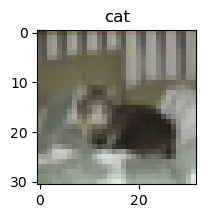

In [60]:
n=150
plt.figure(figsize=(3,2))
plt.imshow(X_train[n,1:])
plt.title(labels[int(y_train[n])]);

2 - Data Distribution: 

In [16]:
type(pd.DataFrame(y_train).value_counts().values)

numpy.ndarray

Text(0.5, 1.0, 'Disrtibution of Training Set')

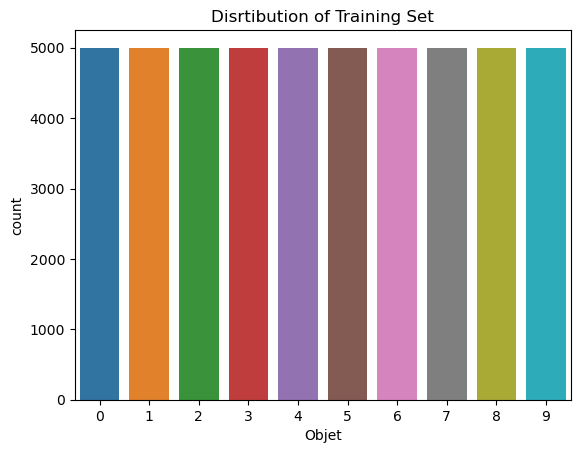

In [17]:
sns.countplot(pd.DataFrame(y_train,columns = ['Objet']),  x = 'Objet')
plt.title('Disrtibution of Training Set')

In [18]:
#plt.barh(a, pd.DataFrame(y_train).value_counts().values())

Text(0.5, 1.0, 'Distribution of test set ')

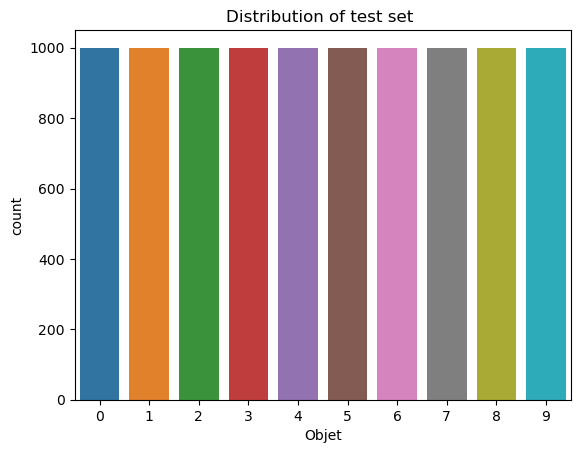

In [19]:
sns.countplot(pd.DataFrame(y_test,columns = ['Objet']),  x = 'Objet')
plt.title('Distribution of test set ')

### Data Preprocessing

In [20]:
X_train , X_test = X_train / 255.0 , X_test / 255.0

In [21]:
pd.DataFrame(y_train).dtypes

0    uint8
dtype: object

In [22]:
from keras.utils import to_categorical

In [23]:
# Transform target variable into one-hotencoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [24]:
type(y_test_cat)

numpy.ndarray

### Model Building

Importing Laibraries

In [25]:
from tensorflow.keras.layers import Conv2D, BatchNormalization , MaxPool2D , Flatten , Dense , Dropout

Initialzing Model

In [26]:
cnn = tf.keras.models.Sequential()

#### Layers 

 - Block 1 :

In [27]:
cnn.add(Conv2D(filters = 32 , kernel_size = 3 , activation = 'relu' , input_shape = [32,32,3], padding = 'same')) #Conv

In [28]:
cnn.add(BatchNormalization()) #Batch Norm

In [29]:
cnn.add(Conv2D(filters = 32 , kernel_size = 3 , activation = 'relu' , input_shape = [32,32,3], padding = 'same')) #Conv

In [30]:
cnn.add(BatchNormalization()) #Batch Norm

In [31]:
cnn.add(MaxPool2D(pool_size = 2 , strides = 2)) #Max Pooling

 - Block 2 :

In [32]:
cnn.add(Conv2D(filters = 64 , kernel_size = 3 , activation = 'relu', padding = 'same')) #Conv
cnn.add(BatchNormalization()) #Batch Norm

In [33]:
cnn.add(Conv2D(filters = 64 , kernel_size = 3 , activation = 'relu', padding = 'same')) #Conv
cnn.add(BatchNormalization()) #Batch Norm

In [34]:
cnn.add(MaxPool2D(pool_size = 2 , strides = 2)) #Max Pooling

 - Block 3 :

In [35]:
cnn.add(Conv2D(filters = 128 , kernel_size = 3 , activation = 'relu', padding = 'same')) #Conv
cnn.add(BatchNormalization()) #Batch Norm

In [36]:
cnn.add(Conv2D(filters = 128 , kernel_size = 3 , activation = 'relu', padding = 'same')) #Conv
cnn.add(BatchNormalization()) #Batch Norm

In [37]:
cnn.add(MaxPool2D(pool_size = 3 , strides = 3)) #Max Pooling

 - Flattenning :

In [38]:
cnn.add(Flatten())

 - Fully Connected Layer + Dropout :

In [39]:
cnn.add(Dense(units = 128 , activation = 'relu'))

In [40]:
cnn.add(Dropout(0.2))

 - Output layer :

In [41]:
cnn.add(tf.keras.layers.Dense(units = 10 , activation = 'softmax'))

In [42]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

### Model Training 

In [43]:
#Compile Model
cnn.compile(optimizer = 'adam' , loss = 'categorical_crossentropy',metrics=['accuracy'])

In [44]:
#help(tf.keras.models.Sequential.compile)

Data Augemtation

In [45]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train_cat, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

Training

In [46]:
cnn.fit(train_generator, validation_data=(X_test, y_test_cat) , epochs=50 )


Epoch 1/50
1563/1563 [==============================] - 34s 17ms/step - loss: 1.4496 - accuracy: 0.4765 - val_loss: 1.3053 - val_accuracy: 0.5617
Epoch 2/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0233 - accuracy: 0.6413 - val_loss: 0.9000 - val_accuracy: 0.6909
Epoch 3/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8522 - accuracy: 0.7064 - val_loss: 0.9947 - val_accuracy: 0.6866
Epoch 4/50
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7397 - accuracy: 0.7485 - val_loss: 0.8127 - val_accuracy: 0.7201
Epoch 5/50
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6672 - accuracy: 0.7726 - val_loss: 0.5995 - val_accuracy: 0.7954
Epoch 6/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6170 - accuracy: 0.7904 - val_loss: 0.6213 - val_accuracy: 0.7940
Epoch 7/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.5790 - accuracy: 0.8031 - val_loss: 0.6105 -

### Model Evaluation

In [47]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [48]:
y_pred.shape

(10000, 10)

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [51]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [52]:
y_pred_labels

array([3, 8, 8, ..., 2, 1, 7], dtype=int64)

In [53]:
#ConfusionMatrixDisplay.from_estimator(cnn,X_test,y_test_cat)
cm = confusion_matrix(y_test, y_pred_labels)

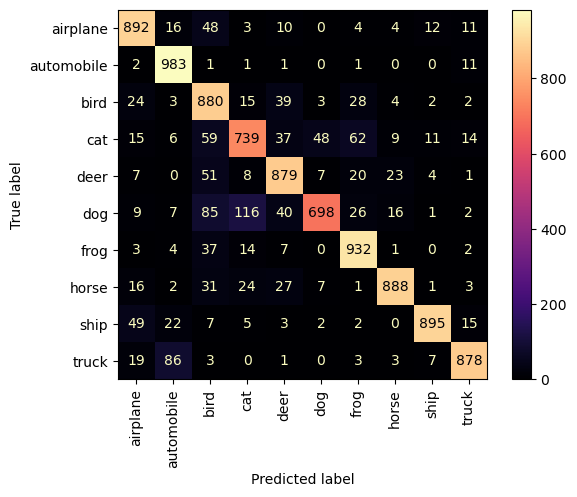

In [54]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='magma')
plt.xticks(rotation = 90)
plt.show()


In [55]:
y_train_pred = cnn.predict(X_train)

1563/1563 [==============================] - 5s 3ms/step


In [56]:
y_train_pred_labels = np.argmax(y_train_pred, axis=1)

In [57]:
cm = confusion_matrix(y_train, y_train_pred_labels)

<Figure size 2000x1200 with 0 Axes>

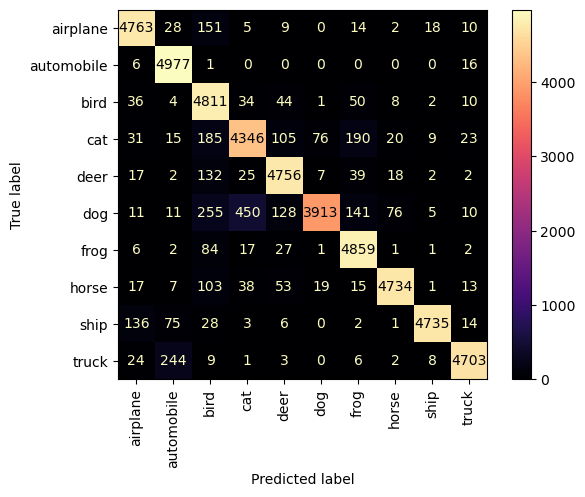

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize =(10,6),dpi = 200)
disp.plot(cmap='magma')
plt.xticks(rotation = 90)
plt.show()


In [59]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
 # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
     # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
     # save plot to file
    
    plt.close()

In [ ]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(cnn.history['loss'], color='blue', label='train')
plt.plot(cnn.history['val_loss'], color='orange', label='test')

     # plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(cnn.history['accuracy'], color='blue', label='train')
plt.plot(cnn.history['val_accuracy'], color='orange', label='test')